### In sklearn we have datasets similar ot seaborn, we are going to import the datasets

In [11]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [5]:
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
digits.target[0]

0

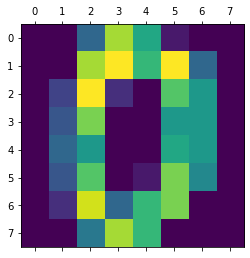

In [13]:
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

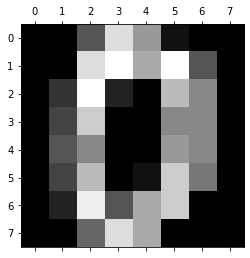

In [14]:
plt.gray()
plt.matshow(digits.images[0])

In [15]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
digits.feature_names[0:5]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']

In [19]:
digits.frame[0]

TypeError: 'NoneType' object is not subscriptable

In [22]:
digits.DESCR[0:5]

'.. _d'

#### Pls see 2nd tab for better understanding of above outputs

### Mutliclass Regression 

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Train and Test data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [37]:
len(X_train)

1437

In [38]:
len(X_test)

360

In [39]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
model.score(X_test, y_test)

0.9583333333333334

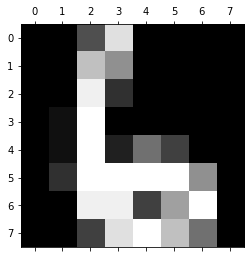

In [46]:
plt.matshow(digits.images[67])

In [50]:
model.predict([digits.data[67]])

array([6])

### In order to check for the missing 5% in accuracy we import confusion_matrix

In [52]:
from sklearn.metrics import confusion_matrix

### We need the output that is predicted and the output we have in data

In [53]:
y_predicted = model.predict(X_test)


### we compare both y_predicted and y_test to find the difference 

In [55]:
cm = confusion_matrix(y_predicted,y_test)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 39,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  1, 33,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 42,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0, 33,  2],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 29]], dtype=int64)

### Plotting the same in a graph, heatmap is best

Text(33.0, 0.5, 'Truth')

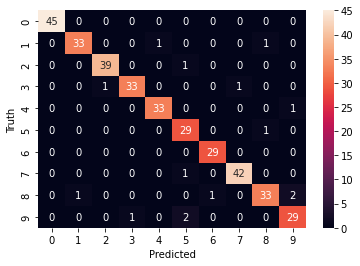

In [58]:
import seaborn as sns
#annot means fill in the boxed values
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")